In [1]:
import pandas as pd

In [2]:
url = 'https://finance.yahoo.co.jp/quote/AAPL/history'

In [3]:
import requests

data = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text,header=0)

In [4]:
data[0].head()

,日付,始値,高値,安値,終値,出来高,調整後終値*
0,2024年1月2日,187.15,188.44,183.89,185.64,82488674,185.64
1,2023年12月29日,193.90,194.40,191.73,192.53,42672148,192.53
2,2023年12月28日,194.14,194.66,193.17,193.58,34049898,193.58
3,2023年12月27日,192.49,193.50,191.09,193.15,48087681,193.15
4,2023年12月26日,193.61,193.89,192.83,193.05,28919310,193.05


In [5]:
data[0].tail()

,日付,始値,高値,安値,終値,出来高,調整後終値*
15,2023年12月8日,194.20,195.99,193.67,195.71,53406358,195.71
16,2023年12月7日,193.63,195.00,193.59,194.27,47477655,194.27
17,2023年12月6日,194.45,194.76,192.11,192.32,41089737,192.32
18,2023年12月5日,190.21,194.40,190.18,193.42,66628398,193.42
19,2023年12月4日,189.98,190.05,187.45,189.43,43389519,189.43


In [6]:
data[0]['調整後終値*'] = pd.to_numeric(data[0]['調整後終値*'], errors='coerce')

In [7]:
data[0].dropna(inplace=True)

In [8]:
from datetime import datetime as dt

In [9]:
data[0]['日付2'] = [dt.strptime(i, '%Y年%m月%d日') for i in data[0]['日付']]

In [10]:
data[0]['日付2']

0    2024-01-02
1    2023-12-29
2    2023-12-28
3    2023-12-27
4    2023-12-26
5    2023-12-22
6    2023-12-21
7    2023-12-20
8    2023-12-19
9    2023-12-18
10   2023-12-15
11   2023-12-14
12   2023-12-13
13   2023-12-12
14   2023-12-11
15   2023-12-08
16   2023-12-07
17   2023-12-06
18   2023-12-05
19   2023-12-04
Name: 日付2, dtype: datetime64[ns]

In [11]:
data[0].set_index('日付2', inplace=True)

In [12]:
data[0].head()

,日付,始値,高値,安値,終値,出来高,調整後終値*
日付2,,,,,,,
2024-01-02,2024年1月2日,187.15,188.44,183.89,185.64,82488674,185.64
2023-12-29,2023年12月29日,193.90,194.40,191.73,192.53,42672148,192.53
2023-12-28,2023年12月28日,194.14,194.66,193.17,193.58,34049898,193.58
2023-12-27,2023年12月27日,192.49,193.50,191.09,193.15,48087681,193.15
2023-12-26,2023年12月26日,193.61,193.89,192.83,193.05,28919310,193.05


In [13]:
data[0]['調整後終値*'].dtype

dtype('float64')

<Axes: title={'center': 'AAPL Stock Price'}, xlabel='日付2'>

/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  func(*args, **kwargs)
/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


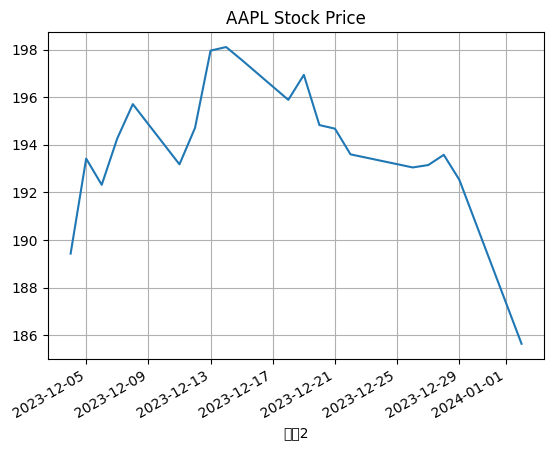

In [14]:
data[0]['調整後終値*'].plot(title='AAPL Stock Price', grid=True)

In [15]:
data[0].to_csv('AAPL_Stock.csv')